In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, HDBSCAN
from sentence_transformers import SentenceTransformer
import umap.umap_ as umap
import matplotlib.pyplot as plt

## Load data

In [2]:
df = pd.read_csv("https://storage.googleapis.com/superlinked-notebook-user-acquisiton-analytics/user_acquisiton_data.csv")

## Scatterplot for numerical variables

<Axes: xlabel='signup_date', ylabel='activity'>

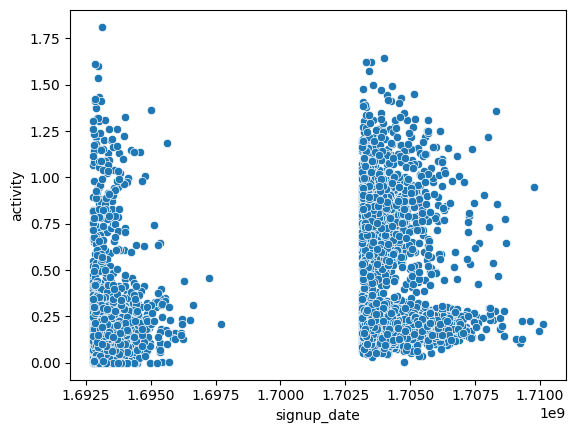

In [3]:
sns.scatterplot(x=df["signup_date"], y=df["activity"], data=df)

## Text vectorization

The ad_creative variables are sentences, and they are all trying to sell the same service. There are some apparent similarities between them so vectorization through text embedding looks logical (can capture much better the meaning of the sentences than treating them as simple categorical variables and using a much simpler encoding)

In [4]:
sentences = df["ad_creative"].unique().tolist()
sentences

['Join a dynamic gaming universe where every challenge pushes your skills to the limit! Connect with like-minded gamers and conquer the virtual realm together!',
 'Join a thriving gaming community and challenge your skills against formidable opponents!',
 'Experience the rush of competitive gaming! Join now to connect with fellow gamers and test your mettle in epic battles!',
 'Step into the arena of endless possibilities! Join now to engage in exhilarating gaming competitions and forge friendships with fellow gamers along the way!',
 'Enter the realm of gaming excellence! Join our vibrant community and compete against some of the most skilled players worldwide!',
 'Seeking thrilling gaming adventures? Join our community of gamers and embark on epic quests against worthy adversaries!',
 'Unleash your gaming potential! Upgrade to premium for 2 months free and dominate the competition with XYZCr$$d!',
 'Embark on your gaming journey with XYZCr$$d! Join now and experience the thrill of co

For text embedding the all-mpnet-base-v2 sentence-transformer model is used from the sentence-transformers framework. (https://huggingface.co/sentence-transformers/all-mpnet-base-v2)

Each sentence will be represented with a vector of length 768

In [5]:
embedding_model = SentenceTransformer("sentence-transformers/all-mpnet-base-v2")

embeddings = embedding_model.encode(sentences)

In [6]:
# merge with to df
embeddings_df = pd.DataFrame({"ad_creative": df["ad_creative"].unique()})
embeddings_df = pd.concat([embeddings_df, pd.DataFrame(embeddings)], axis=1)

df = pd.merge(df, embeddings_df, on="ad_creative")

## Scaling variables

To rescale the variables I am using StandardScaler from sklearn, which standarizes the data.

In [7]:
# Drop id and ad_creative -> no need to rescale them, not used in clustering
df = df.drop(columns=["id", "ad_creative"])

df.columns = df.columns.astype(str)  # scaler didn't work with int column names

In [8]:
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df))

In [9]:
df

,signup_date,activity,0,1,2,3,4,5,6,7,...,758,759,760,761,762,763,764,765,766,767
0,1693044869,0.295882,-0.006716,-0.004575,-0.036820,0.012844,-0.008943,-0.004632,-0.069624,0.002308,...,0.027680,0.024504,-0.021059,0.022115,0.007634,-0.012874,0.009305,0.000326,0.017103,0.009540
1,1692863645,0.118947,-0.006716,-0.004575,-0.036820,0.012844,-0.008943,-0.004632,-0.069624,0.002308,...,0.027680,0.024504,-0.021059,0.022115,0.007634,-0.012874,0.009305,0.000326,0.017103,0.009540
2,1692863627,0.285698,-0.006716,-0.004575,-0.036820,0.012844,-0.008943,-0.004632,-0.069624,0.002308,...,0.027680,0.024504,-0.021059,0.022115,0.007634,-0.012874,0.009305,0.000326,0.017103,0.009540
3,1692882426,0.432470,-0.006716,-0.004575,-0.036820,0.012844,-0.008943,-0.004632,-0.069624,0.002308,...,0.027680,0.024504,-0.021059,0.022115,0.007634,-0.012874,0.009305,0.000326,0.017103,0.009540
4,1692851917,0.330607,-0.006716,-0.004575,-0.036820,0.012844,-0.008943,-0.004632,-0.069624,0.002308,...,0.027680,0.024504,-0.021059,0.022115,0.007634,-0.012874,0.009305,0.000326,0.017103,0.009540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1703714237,0.190967,-0.006985,0.092591,0.027513,0.015073,-0.003326,0.017605,-0.009821,0.023890,...,0.031995,0.031613,-0.018459,0.025267,-0.002624,-0.013610,-0.029072,0.015062,0.034634,0.019022
7996,1705850624,0.147791,-0.006985,0.092591,0.027513,0.015073,-0.003326,0.017605,-0.009821,0.023890,...,0.031995,0.031613,-0.018459,0.025267,-0.002624,-0.013610,-0.029072,0.015062,0.034634,0.019022
7997,1703472194,1.027056,-0.006985,0.092591,0.027513,0.015073,-0.003326,0.017605,-0.009821,0.023890,...,0.031995,0.031613,-0.018459,0.025267,-0.002624,-0.013610,-0.029072,0.015062,0.034634,0.019022
7998,1703344060,0.180196,-0.006985,0.092591,0.027513,0.015073,-0.003326,0.017605,-0.009821,0.023890,...,0.031995,0.031613,-0.018459,0.025267,-0.002624,-0.013610,-0.029072,0.015062,0.034634,0.019022


# Clustering

## HDBSCAN

Default hyperparameter in Amazon DenseClus library:
- min_samples = 15
- min_cluster_size = 100

In [10]:
hdbscan = HDBSCAN(min_cluster_size=400, min_samples=15)
hdbscan_clusters = hdbscan.fit_predict(df)

In [11]:
hdbscan_clusters

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

Here I ran into the problem of hyperparameter tuning. Without (pretty much) any knowledge of the data set and the data generating process, and this being the first clustering I have ever done, I assessed that I can't really choose hyperparameters other than randomly trying out different values.

So, I looked for ideas to automate this process and found a blogpost (https://towardsdatascience.com/tuning-with-hdbscan-149865ac2970) based on a scientific paper (https://www.dbs.ifi.lmu.de/~zimek/publications/SDM2014/DBCV.pdf) that provides a validity index for clustering. While the authors note that this measure is also not fool-proof, however it can serve as a objective measure of different clusterings.

## HDBSCAN with parameter optimization

## DBSCAN

- Először megcsinálni DBSCAN-t jóra
- Ábrák
- Eljátszani a HDB hyperparameterekkel (sklearnös oldal szerint először egy jó min_cluster_size-ot érdemes találni)
- Utána megcsinál mérő szerinti optimalizáció

In [12]:
dbscan_clusters = DBSCAN(eps=0.5, min_samples=10).fit_predict(df)

In [13]:
df["hdbscan_clusters"] = hdbscan_clusters
df["hdbscan_clusters"].value_counts()

hdbscan_clusters
1    6000
0    2000
Name: count, dtype: int64

In [14]:
df["dbscan_clusters"] = dbscan_clusters
df["dbscan_clusters"].value_counts()

dbscan_clusters
-1    8000
Name: count, dtype: int64

## Plotting via UMAP

In [15]:
umap_data = umap.UMAP(
    n_neighbors=15, n_components=2, metric='euclidean'
).fit_transform(df)

In [16]:
umap_data = pd.DataFrame(umap_data, columns=["x", "y"])
umap_data = umap_data.assign(
    hdbscan_clusters=df["hdbscan_clusters"], dbscan_clusters=df["dbscan_clusters"]
)

In [17]:
umap_data["hdbscan_clusters"].value_counts()

hdbscan_clusters
1    6000
0    2000
Name: count, dtype: int64

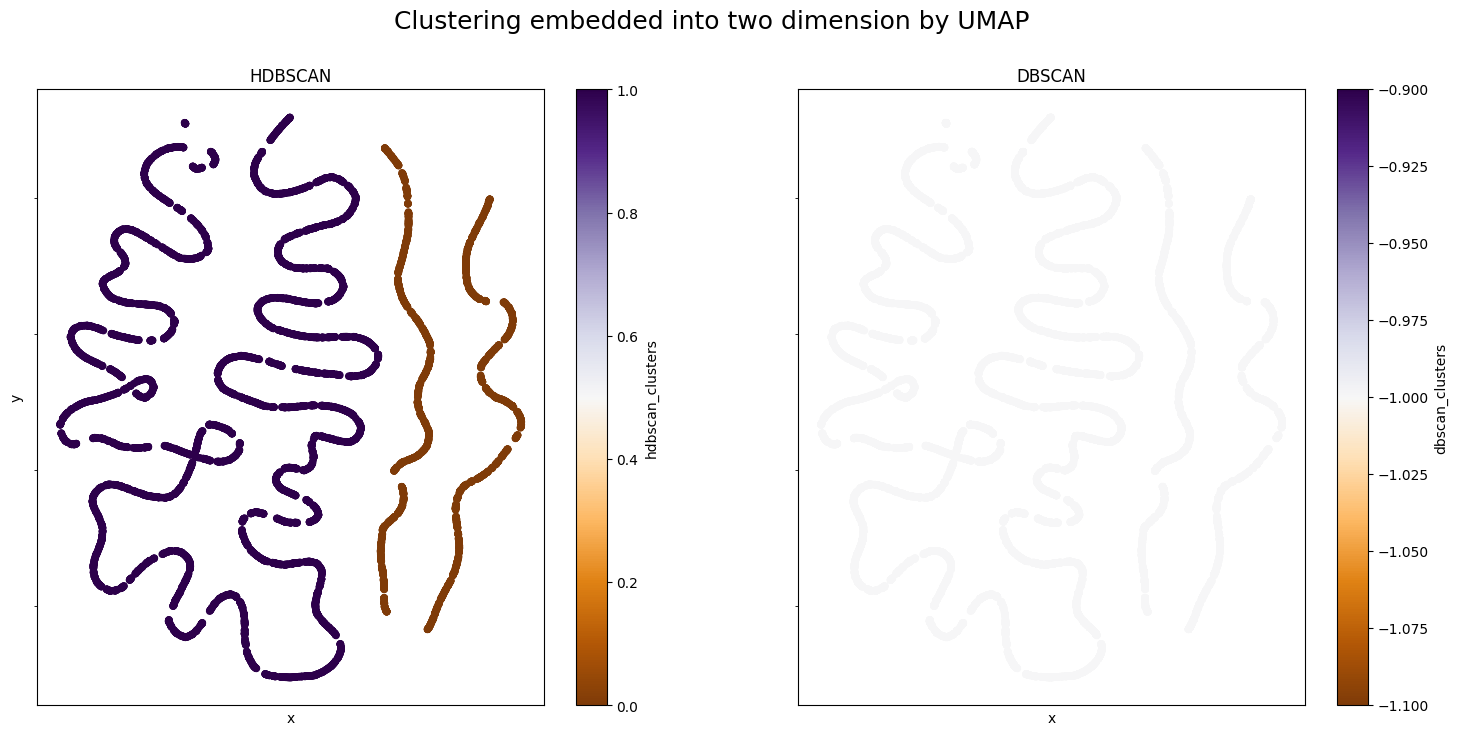

In [18]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(18, 8))
umap_data.plot.scatter(x="x", y="y", c="hdbscan_clusters", ax=ax[0], cmap="PuOr")
umap_data.plot.scatter(x="x", y="y", c="dbscan_clusters", ax=ax[1], cmap="PuOr")
plt.suptitle("Clustering embedded into two dimension by UMAP", fontsize=18)
plt.setp(ax[0], xticks=[], yticks=[])
plt.setp(ax[1], xticks=[], yticks=[])
ax[0].set_title("HDBSCAN", fontsize=12)
ax[1].set_title("DBSCAN", fontsize=12)
plt.show()

Na most kicsit felhúztam magam, eddig a HDBSCAN 8 kategóriát csinált, és esküszöm nem módosítottam semmit a kódon (átnéztem többször is) és most csak két kategóriára osztja az adatot. Van egy hipotézisem, hogy mintha nem tudná jól importálni a HDBSCAN-t az sklearnből, de ezzel most nem tudok ma tovább foglalkozni, mert már megőrjít, hogy nem veszem észre hol romlott el teljesen váratlanul a dolog. Akartam egy valamennyire objektív mutatószám fényében optimalizált HDBSCAN-t csinálni, de most annyira felhúzott ez a dolog, hogy leadom így és javítom péntekig. Megértem, ha ezért strigulát kapok, de most annyira ideges vagyok, hogy nem érdekel.